# ENGR 891: Programming Assignment #4
# Part B: 
## Pre-Processing
### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import export_graphviz
import graphviz

### Load data

In [2]:
df = pd.read_csv('/Users/bwyan/Desktop/EngineeringGrades.csv', header = 0)
df

,Homework 1,Homework 2,Homework 3,Homework 4,Homework 5,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Quiz 6,Quiz 7,Quiz 8,Quiz 9,Quiz 10,Midterm,Final,Grade
0,59.5,48.0,0.0,0.0,NaN,4,0.0,4.0,4.0,6.0,0.0,0,0.0,0.0,0.0,0,0,1
1,104.0,112.0,110.0,97.0,97.0,9,9.0,9.5,10.0,8.0,7.0,10,10.0,10.0,10.0,35,33,0
2,83.0,98.0,106.5,93.0,97.0,6,6.0,8.0,5.0,6.0,10.0,10,7.5,6.0,6.0,30,28,0
3,45.5,88.0,78.0,89.0,93.0,0,0.0,7.0,4.0,0.0,0.0,6,8.0,5.5,6.0,26,26,2
4,101.0,89.0,102.0,94.5,100.0,6,4.0,9.0,10.0,4.0,9.0,9,6.5,8.0,10.0,32,34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,103.0,104.0,110.0,96.0,100.0,10,10.0,10.0,9.0,10.0,10.0,10,10.0,8.0,10.0,32,33,0
61,98.0,80.5,83.0,83.0,105.0,5,6.0,9.0,7.5,4.0,6.0,8,6.0,7.0,10.0,21,31,0
62,105.0,95.5,106.0,100.0,105.0,10,10.0,8.0,7.0,10.0,10.0,10,8.5,8.0,10.0,35,35,0
63,97.0,90.0,79.0,79.0,NaN,5,5.0,7.0,0.0,4.0,10.0,10,6.0,4.0,8.0,32,24,2


### Check if there is a NAN in data set, clean the data if it is True

In [3]:
# Check if there is a NAN in data set, clean the data if it is True
df.isna().values.any()

True

### Fill NaN values

In [4]:
df = df.fillna(0)
df

,Homework 1,Homework 2,Homework 3,Homework 4,Homework 5,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Quiz 6,Quiz 7,Quiz 8,Quiz 9,Quiz 10,Midterm,Final,Grade
0,59.5,48.0,0.0,0.0,0.0,4,0.0,4.0,4.0,6.0,0.0,0,0.0,0.0,0.0,0,0,1
1,104.0,112.0,110.0,97.0,97.0,9,9.0,9.5,10.0,8.0,7.0,10,10.0,10.0,10.0,35,33,0
2,83.0,98.0,106.5,93.0,97.0,6,6.0,8.0,5.0,6.0,10.0,10,7.5,6.0,6.0,30,28,0
3,45.5,88.0,78.0,89.0,93.0,0,0.0,7.0,4.0,0.0,0.0,6,8.0,5.5,6.0,26,26,2
4,101.0,89.0,102.0,94.5,100.0,6,4.0,9.0,10.0,4.0,9.0,9,6.5,8.0,10.0,32,34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,103.0,104.0,110.0,96.0,100.0,10,10.0,10.0,9.0,10.0,10.0,10,10.0,8.0,10.0,32,33,0
61,98.0,80.5,83.0,83.0,105.0,5,6.0,9.0,7.5,4.0,6.0,8,6.0,7.0,10.0,21,31,0
62,105.0,95.5,106.0,100.0,105.0,10,10.0,8.0,7.0,10.0,10.0,10,8.5,8.0,10.0,35,35,0
63,97.0,90.0,79.0,79.0,0.0,5,5.0,7.0,0.0,4.0,10.0,10,6.0,4.0,8.0,32,24,2


### Check if there is a NAN in data set, clean the data if it is True

In [5]:
# Check if there is a NAN in data set, clean the data if it is True
df.isna().values.any()

False

### Create a data frame object for the features and another data frame object for the target

In [6]:
# Create a data frame object for the features and another data frame object for the target
df_features = df.drop(columns=['Grade'])  # Data frame containing all features excluding the target
df_target = df['Grade']# Data frame containing the target 
print(df_target.astype)

<bound method NDFrame.astype of 0     1
1     0
2     0
3     2
4     0
     ..
60    0
61    0
62    0
63    2
64    1
Name: Grade, Length: 65, dtype: int64>


### Convert the above two data frame objects into two NumPy arrays

In [7]:
# Convert the above two data frame objects into two NumPy arrays
X = np.asarray(df_features) # Data Matrix containing all features excluding the target
y = np.asarray(df_target) # Data Matrix containing all features excluding the target

print(X.shape)
print(y.shape)
print("\nX data type: ", X.dtype)
print("y data type: ", y.dtype)

(65, 17)
(65,)

X data type:  float64
y data type:  int64


### Partition the dataset into training & test subsets: 90% training & 10% test 

In [8]:
# Partition the dataset into training & test subsets: 90% training & 10% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Model Selection: Hyperparameter Tuning

In [9]:
%%time

param_grid = {'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
              'max_depth': [2, 3, 4, 5],
              'criterion': ['entropy', 'gini'],
              'max_leaf_nodes': [2, 3, 4, 5],
              'max_features':['auto', 'sqrt', 'log2'],
              'min_samples_split':[2, 3, 4, 5]
             }


dt_clf = DecisionTreeClassifier()

dt_clf_cv = GridSearchCV(dt_clf, param_grid, scoring='f1_micro', cv=5, verbose=1, n_jobs=-1)
dt_clf_cv.fit(X_train, y_train)

params_optimal = dt_clf_cv.best_params_

print("Best Score (F1_micro score): %f" % dt_clf_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)
print("\n")

Fitting 5 folds for each of 3072 candidates, totalling 15360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    4.1s


Best Score (F1_micro score): 0.880303
Optimal Hyperparameter Values:  {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


Wall time: 6.44 s


[Parallel(n_jobs=-1)]: Done 15360 out of 15360 | elapsed:    6.3s finished


### Train the Optimal Classifier

In [10]:
tree_clf = DecisionTreeClassifier(**params_optimal)

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features='auto', max_leaf_nodes=5,
                       min_samples_leaf=2)

### Values of train accuracy

In [11]:
# Train accuracy of the model
y_train_predicted = tree_clf.predict(X_train)

print("Training Accuracy: ", tree_clf.score(X_train, y_train))

Training Accuracy:  0.9137931034482759


### Evaluate the Optimal Classifier on Test Data

In [12]:
y_test_predicted = tree_clf.predict(X_test)

test_accuracy_tuned = accuracy_score(y_test, y_test_predicted)
print("Test Accuracy: ", test_accuracy_tuned)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

Test Accuracy:  0.8571428571428571

Test Confusion Matrix:
[[5 0 0]
 [0 0 1]
 [0 0 1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         1

    accuracy                           0.86         7
   macro avg       0.50      0.67      0.56         7
weighted avg       0.79      0.86      0.81         7



D:\conda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Visualizating The Decision Tree

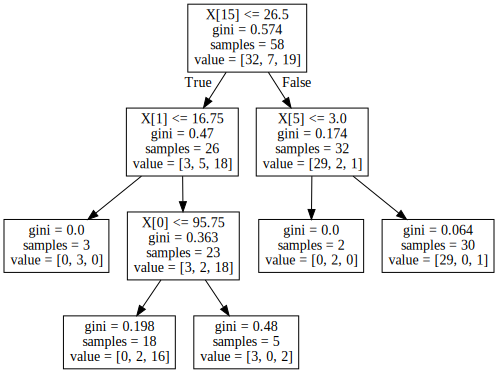

In [13]:
dot_data = export_graphviz(tree_clf, out_file=None) 

graph = graphviz.Source(dot_data) 

# Visualize the graph
graph

### Lists out feature names and target names

In [14]:
feature_names=['Homework 1', 'Homework 2', 'Homework 3', 'Homework 4', 'Homework 5',
       'Quiz 1', 'Quiz 2', 'Quiz 3', 'Quiz 4', 'Quiz 5', 'Quiz 6', 'Quiz 7',
       'Quiz 8', 'Quiz 9', 'Quiz 10', 'Midterm', 'Final']
target_names=['Good', 'At-risk', 'Pass']

### Informed Visualization

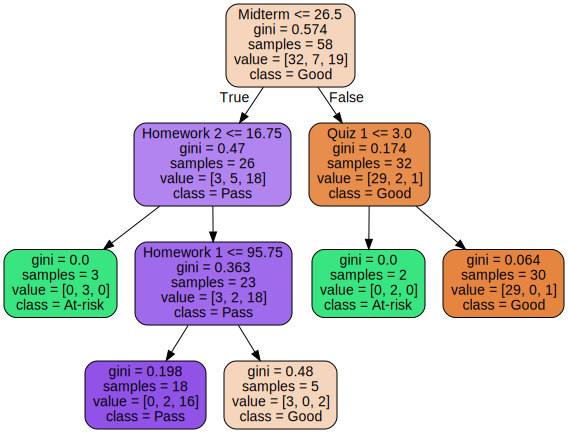

In [15]:
dot_data = export_graphviz(
    tree_clf,
    out_file=None,
    feature_names=feature_names,
    class_names=target_names,
    rounded=True,
    filled=True
)

graph = graphviz.Source(dot_data)  

graph

### Observation
Midterm,Homework 2 and Quiz 1 are the most important three key features to determine whether a student will be at-risk according to the above plot.

### Feature Selection

In [16]:
for i in range(len(feature_names)):
    print("%10s : %.2f" % (feature_names[i], tree_clf.feature_importances_[i]))

Homework 1 : 0.09
Homework 2 : 0.15
Homework 3 : 0.00
Homework 4 : 0.00
Homework 5 : 0.00
    Quiz 1 : 0.14
    Quiz 2 : 0.00
    Quiz 3 : 0.00
    Quiz 4 : 0.00
    Quiz 5 : 0.00
    Quiz 6 : 0.00
    Quiz 7 : 0.00
    Quiz 8 : 0.00
    Quiz 9 : 0.00
   Quiz 10 : 0.00
   Midterm : 0.61
     Final : 0.00


## Experiment 12: Random Forest Model

### Model Selection: Hyperparameter Tuning

In [17]:
%%time

param_grid = {'n_estimators': [10, 20, 50, 100],
              'criterion': ['entropy', 'gini'],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
              'max_depth': [2, 3, 4, 5],
              'max_leaf_nodes': [2, 5, 10, 15]}


'''
Create a Random Forest classifier:
- Uses out-of-bag samples to estimate the generalization accuracy
- Uses the values of y to automatically adjust weights inversely proportionalto class frequencies 
   in the input data 
'''
dt_clf = RandomForestClassifier(class_weight="balanced", oob_score=True)

dt_clf_cv = GridSearchCV(dt_clf, param_grid, scoring='f1_micro', cv=3, verbose=1, n_jobs=-1)
dt_clf_cv.fit(X_train, y_train)

params_optimal = dt_clf_cv.best_params_

print("Best Score (F1 score): %f" % dt_clf_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)
print("\n")

Fitting 3 folds for each of 1024 candidates, totalling 3072 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 3044 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 3057 out of 3072 | elapsed:   41.8s remaining:    0.1s


Best Score (F1 score): 0.983333
Optimal Hyperparameter Values:  {'criterion': 'entropy', 'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_leaf': 3, 'n_estimators': 100}


Wall time: 42.3 s


[Parallel(n_jobs=-1)]: Done 3072 out of 3072 | elapsed:   42.1s finished


### Evaluate the Optimal Classifier on Test Data

In [18]:
forest_clf = RandomForestClassifier(class_weight="balanced", oob_score=True, **params_optimal)

forest_clf.fit(X_train, y_train)

y_train_predicted = forest_clf.predict(X_train)

print("Train Accuracy: ", accuracy_score(y_train, y_train_predicted))

print("Out of Bag (oob) Score: ", forest_clf.oob_score_)

y_test_predicted = forest_clf.predict(X_test)

print("\nTest Accuracy: ", accuracy_score(y_test, y_test_predicted))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

Train Accuracy:  0.9827586206896551
Out of Bag (oob) Score:  0.9310344827586207

Test Accuracy:  0.8571428571428571

Test Confusion Matrix:
[[4 0 1]
 [0 1 0]
 [0 0 1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00         1
           2       0.50      1.00      0.67         1

    accuracy                           0.86         7
   macro avg       0.83      0.93      0.85         7
weighted avg       0.93      0.86      0.87         7



### Feature Selection

In [19]:
for i in range(len(feature_names)):
    print("%10s : %.2f" % (feature_names[i], forest_clf.feature_importances_[i]))

Homework 1 : 0.03
Homework 2 : 0.05
Homework 3 : 0.02
Homework 4 : 0.10
Homework 5 : 0.03
    Quiz 1 : 0.06
    Quiz 2 : 0.02
    Quiz 3 : 0.03
    Quiz 4 : 0.04
    Quiz 5 : 0.01
    Quiz 6 : 0.05
    Quiz 7 : 0.06
    Quiz 8 : 0.12
    Quiz 9 : 0.04
   Quiz 10 : 0.06
   Midterm : 0.10
     Final : 0.18


### Observation
Final, Midterm and Quiz 8 are the most important three key features by using the feature importance attribute of the
Random Forest model.